# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat = []
lng = []
city_id = []
wind = []
hum = []
max_tmp = []
country = []
cloudiness = []
city_name = []
date = []

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        date.append(response['dt'])
        #print(f"Processing {cities[city]} | {city}")
    except: KeyError 
        
       #print(f"No data returnd for " {city}: "skipping.")
        
        
    
    print(city)


cabedelo
punta arenas
severo-kurilsk
butaritari
fort nelson
rawson
portland
mataura
bredasdorp
cabo san lucas
gouyave
rikitea
teloloapan
tema
grand river south east
lagoa
hirara
mar del plata
ushuaia
kavieng
alofi
hobart
bluff
busselton
hithadhoo
upernavik
lorengau
arlit
constitucion
aginskoye
kayankulam
viedma
nizhneyansk
umzimvubu
waddan
ponta do sol
naustdal
porto santo
yar-sale
jamestown
new norfolk
bengkulu
kapaa
matay
hilo
biak
saskylakh
arraial do cabo
castro
victoria
lakes entrance
chuy
east london
yellowknife
kars
kodiak
praia da vitoria
atuona
phan thiet
harper
phnum penh
albany
deer lake
san cristobal
tasiilaq
stykkisholmur
chokurdakh
dumbravita
vaini
brae
cabo rojo
phan rang
kavaratti
rivadavia
barentsburg
taolanaro
rio claro
kigoma
tuatapere
mehamn
rupert
pevek
nivala
barrow
auki
provideniya
te anau
marawi
puerto ayora
hermanus
tessalit
dikson
bethel
nikolskoye
severiano melo
ponta delgada
buqayq
thaton
severnyy
stephenville
lhokseumawe
cherskiy
esso
verkhnevilyuysk
lethem

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_tmp,
    "Wind Speed": wind
    
}

weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Cabedelo,75,BR,1579917004,88,-6.98,-34.83,78.80,4.70
1,Punta Arenas,20,CL,1579916809,76,-53.15,-70.92,48.20,10.38
2,Severo-Kuril'sk,95,RU,1579917005,90,50.68,156.12,17.17,41.03
3,Butaritari,100,KI,1579917005,71,3.07,172.79,84.51,3.96
4,Fort Nelson,90,CA,1579917005,85,58.81,-122.70,10.40,2.24


In [7]:
south_forgets = weather_df.loc[weather_df["Latitude"]<= 0, :]

south_forgets.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Cabedelo,75,BR,1579917004,88,-6.98,-34.83,78.80,4.70
1,Punta Arenas,20,CL,1579916809,76,-53.15,-70.92,48.20,10.38
5,Rawson,100,AR,1579917005,47,-43.30,-65.10,70.02,30.87
7,Mataura,72,NZ,1579917005,63,-46.19,168.86,66.99,5.01
8,Bredasdorp,26,ZA,1579917005,94,-34.53,20.04,68.00,1.30


In [8]:
north_remembers = weather_df.loc[weather_df["Latitude"] >= 0, :]


north_remembers.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
2,Severo-Kuril'sk,95,RU,1579917005,90,50.68,156.12,17.17,41.03
3,Butaritari,100,KI,1579917005,71,3.07,172.79,84.51,3.96
4,Fort Nelson,90,CA,1579917005,85,58.81,-122.70,10.40,2.24
6,Portland,75,US,1579916716,81,45.52,-122.68,53.60,3.47
9,Cabo San Lucas,90,MX,1579917005,72,22.89,-109.91,69.01,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

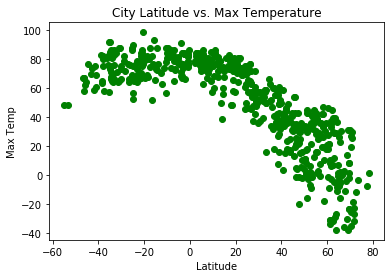

In [9]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(weather_df[["Latitude"]], weather_df[["Max Temperature"]], marker="o", color="green")
plt.show()

#### Latitude vs. Humidity Plot

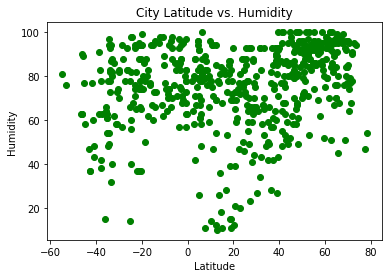

In [10]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(weather_df[["Latitude"]], weather_df[["Humidity"]], marker="o", color="green")
plt.show()

#### Latitude vs. Cloudiness Plot

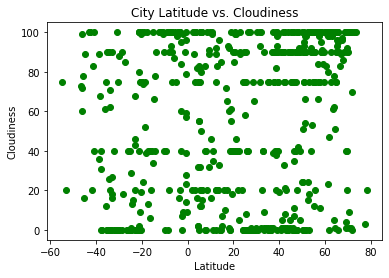

In [11]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_df[["Latitude"]], weather_df[["Cloudiness"]], marker="o", color="green")
plt.show()

#### Latitude vs. Wind Speed Plot

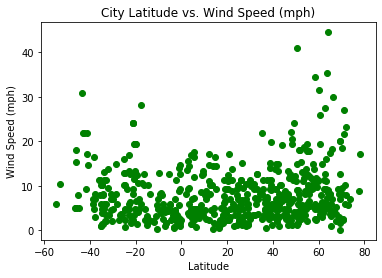

In [12]:
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_df[["Latitude"]], weather_df[["Wind Speed"]], marker="o", color="green")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

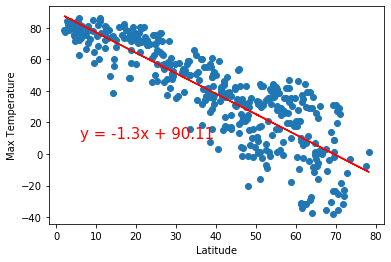

In [15]:
x_values = north_remembers['Latitude']
y_values = north_remembers['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

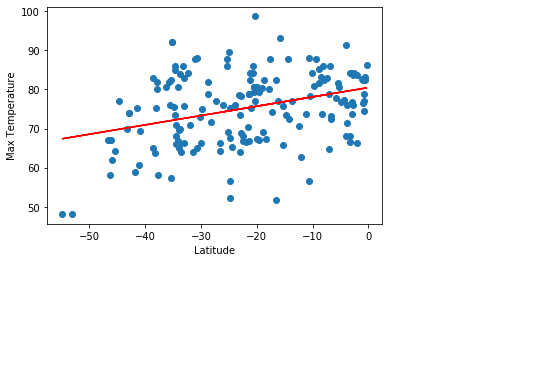

In [16]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

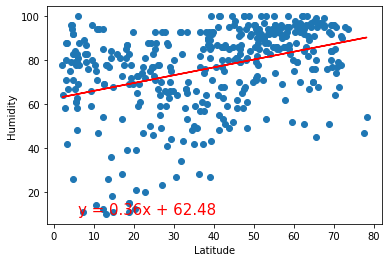

In [17]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

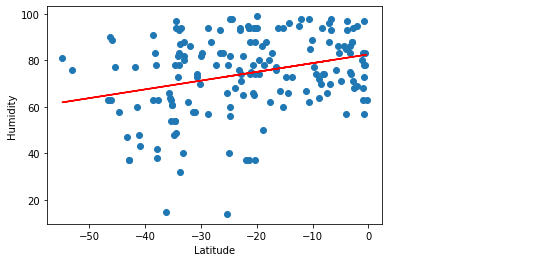

In [18]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

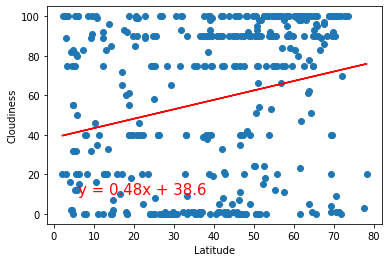

In [19]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

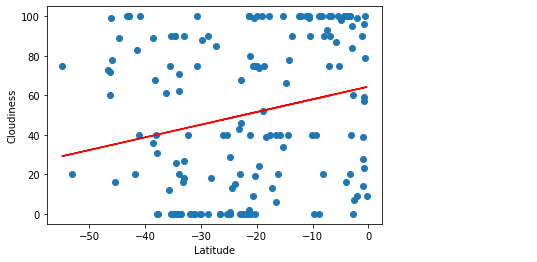

In [20]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

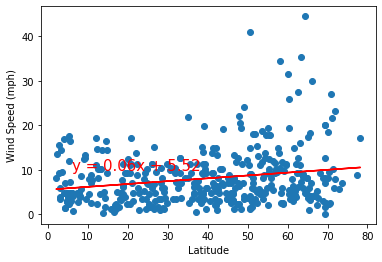

In [21]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

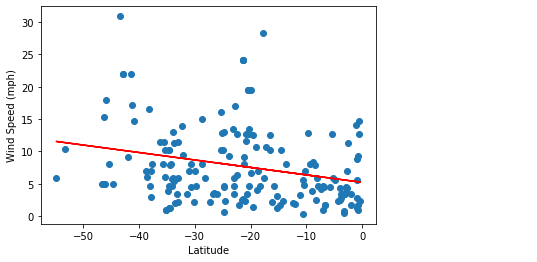

In [22]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()